In [0]:
import torch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [0]:
classes = ('normal', 'opacity') 
path_train = '/content/drive/My Drive/hufs/RSNA2019/1500/'
path_valid = '/content/drive/My Drive/hufs/RSNA2019/100/'
batch_size = 100

In [0]:
trainset = torchvision.datasets.ImageFolder(root = path_train,transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                                          transforms.Resize((64,64)),
                                                                                          transforms.ToTensor()]))
validset = torchvision.datasets.ImageFolder(root = path_valid,transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                                          transforms.Resize((64,64)),
                                                                                          transforms.ToTensor()]))
train_iter = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
valid_iter = torch.utils.data.DataLoader(validset,batch_size=batch_size,shuffle=True)

In [7]:
tgtnames = trainset.classes
tgtnames

['normal', 'opacity']

torch.Size([100])
torch.Size([100, 1, 64, 64])


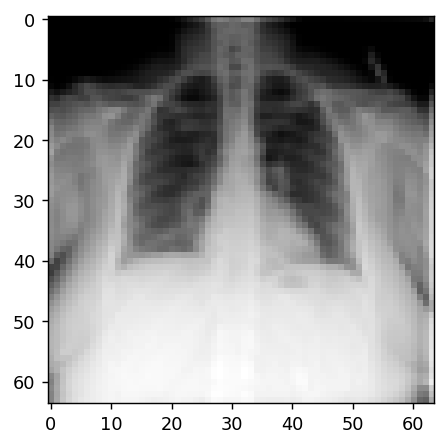

tensor(1)
opacity


In [18]:
dataiter=iter(train_iter)
images, labels = dataiter.next()
print(labels.shape)
print(images.shape)
I = images[0][0].numpy()
plt.figure(dpi=128)
plt.imshow(I,cmap='gray')
plt.show()
print(labels[0])
print(tgtnames[labels[0]])


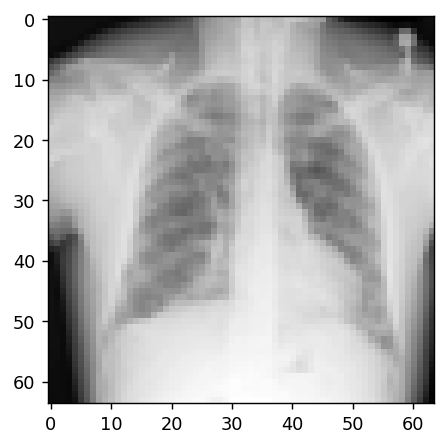

opacity


In [19]:
n=42
I = images[n][0].numpy()
plt.figure(dpi=128)
plt.imshow(I,cmap='gray')
plt.show()
print(tgtnames[labels[n]])


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [0]:
# setting hyper-parameters
learning_rate = 0.02
num_epochs = 10
num_workers = 0

In [0]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)
    
net = torch.nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    Flatten(),
    nn.Linear(in_features=16*14*14, out_features=120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 2)
)

In [13]:
torch.nn.init.xavier_uniform_(net[0].weight)
torch.nn.init.xavier_uniform_(net[3].weight)
torch.nn.init.xavier_uniform_(net[7].weight)
torch.nn.init.xavier_uniform_(net[9].weight)
torch.nn.init.xavier_uniform_(net[11].weight)
net = net.to(device)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten()
  (7): Linear(in_features=3136, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=2, bias=True)
)

In [0]:
# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(net.parameters(),lr=learning_rate) # sgd

tensor([[ 0.0075,  0.0483],
        [ 0.0213,  0.0341],
        [ 0.0196,  0.0005],
        [-0.0030,  0.0621]], device='cuda:0', grad_fn=<SliceBackward>)


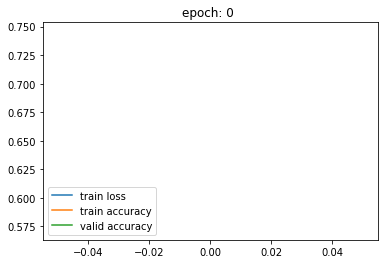

train loss:  0.6878992080688476
train accuracy:  0.5720000267028809
valid accuracy:  0.7450000047683716
tensor([[ 0.0119, -0.0189],
        [ 0.0031, -0.0382],
        [-0.0197,  0.0473],
        [-0.0622,  0.0063]], device='cuda:0', grad_fn=<SliceBackward>)


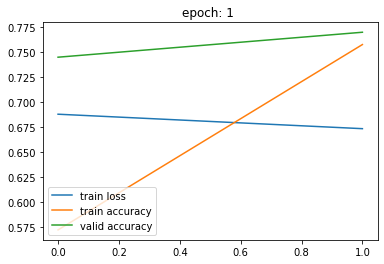

train loss:  0.6734126408894857
train accuracy:  0.7576666474342346
valid accuracy:  0.7699999809265137
tensor([[-0.0507,  0.0358],
        [-0.0419, -0.0621],
        [-0.1320,  0.1706],
        [ 0.0549, -0.1391]], device='cuda:0', grad_fn=<SliceBackward>)


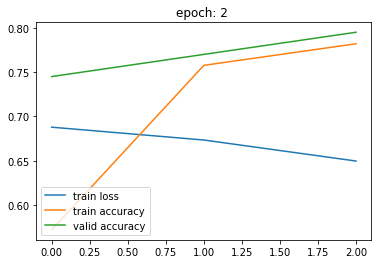

train loss:  0.6497035980224609
train accuracy:  0.7820000052452087
valid accuracy:  0.7950000166893005
tensor([[-0.1640,  0.0196],
        [-0.3789,  0.3514],
        [-0.3292,  0.2535],
        [-0.1603,  0.1737]], device='cuda:0', grad_fn=<SliceBackward>)


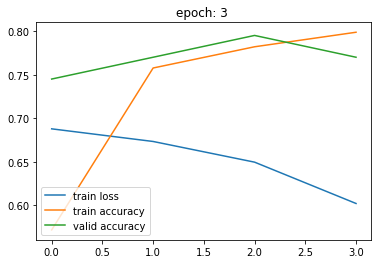

train loss:  0.6023115793863932
train accuracy:  0.7986666560173035
valid accuracy:  0.7699999809265137
tensor([[ 0.1285, -0.6139],
        [-0.0395, -0.4117],
        [-0.3553,  0.0191],
        [ 0.4533, -0.8614]], device='cuda:0', grad_fn=<SliceBackward>)


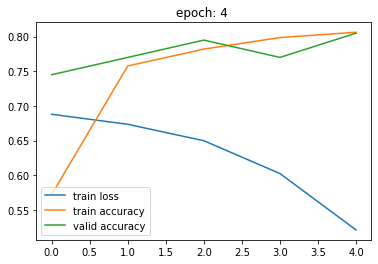

train loss:  0.5209134419759115
train accuracy:  0.8063333630561829
valid accuracy:  0.8050000071525574
tensor([[-0.3813,  0.1380],
        [-1.0652,  0.8647],
        [-1.3606,  1.1354],
        [-0.3065, -0.2360]], device='cuda:0', grad_fn=<SliceBackward>)


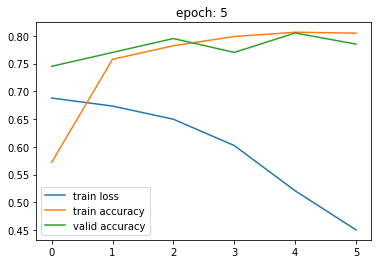

train loss:  0.450442632039388
train accuracy:  0.8046666383743286
valid accuracy:  0.7850000262260437
tensor([[ 0.1667, -0.5091],
        [-1.6137,  1.5980],
        [ 0.9758, -1.7125],
        [-0.3299, -0.1767]], device='cuda:0', grad_fn=<SliceBackward>)


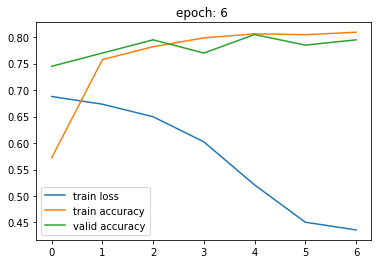

train loss:  0.43588991165161134
train accuracy:  0.809333324432373
valid accuracy:  0.7950000166893005
tensor([[-1.1233,  0.9905],
        [-0.6681,  0.2466],
        [-0.1987, -0.2901],
        [-0.1196, -0.3745]], device='cuda:0', grad_fn=<SliceBackward>)


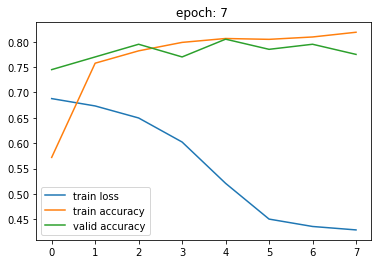

train loss:  0.4291120211283366
train accuracy:  0.8186666369438171
valid accuracy:  0.7749999761581421
tensor([[-1.3396,  1.4166],
        [-0.2968, -0.2341],
        [ 0.9313, -1.7313],
        [-0.1048, -0.3724]], device='cuda:0', grad_fn=<SliceBackward>)


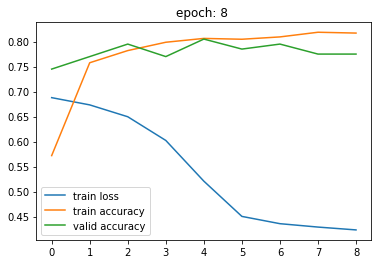

train loss:  0.4234269777933756
train accuracy:  0.8169999718666077
valid accuracy:  0.7749999761581421
tensor([[ 0.9858, -1.8122],
        [ 0.3779, -1.1035],
        [-0.9354,  0.6995],
        [-0.2810, -0.1184]], device='cuda:0', grad_fn=<SliceBackward>)


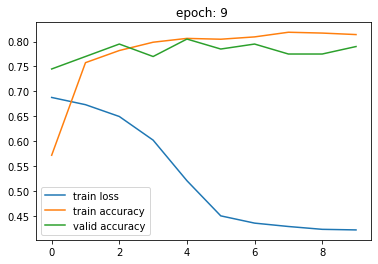

train loss:  0.42225735982259116
train accuracy:  0.8140000104904175
valid accuracy:  0.7900000214576721


In [15]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_valid = np.array([])

for epoch in range(num_epochs):
  i=0
  l_epoch = 0
  correct = 0
  for X,y in train_iter:
    i=i+1
    X,y = X.to(device),y.to(device)
    y_hat=net(X)
    correct += (y_hat.argmax(dim=1)==y).sum()
    l=loss(y_hat,y)
    l_epoch+=l
    alg.zero_grad()
    l.backward()
    alg.step()

  loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/i)
  accs_train = np.append(accs_train,correct.cpu()/3000.)

  correct = 0
  for X,y in valid_iter:
    X,y = X.to(device),y.to(device)
    y_hat = net(X)
    correct += (y_hat.argmax(dim=1)==y).sum()

  print((y_hat[:4]))
  accs_valid = np.append(accs_valid,correct.cpu()/200.)


  if epoch%4 > -1:
    plt.plot(loss_train,label='train loss')
    plt.plot(accs_train,label='train accuracy')
    plt.plot(accs_valid,label='valid accuracy')
    plt.legend(loc='lower left')
    plt.title('epoch: %d '%(epoch))
    plt.pause(.0001)

    print('train loss: ',loss_train[-1])
    print('train accuracy: ',accs_train[-1])
    print('valid accuracy: ',accs_valid[-1])

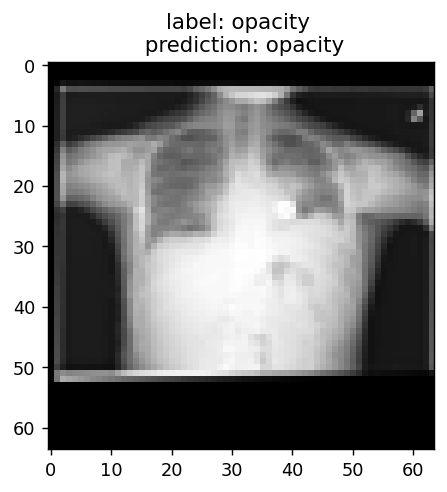

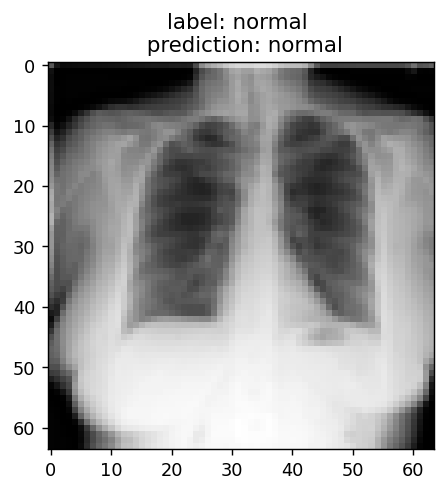

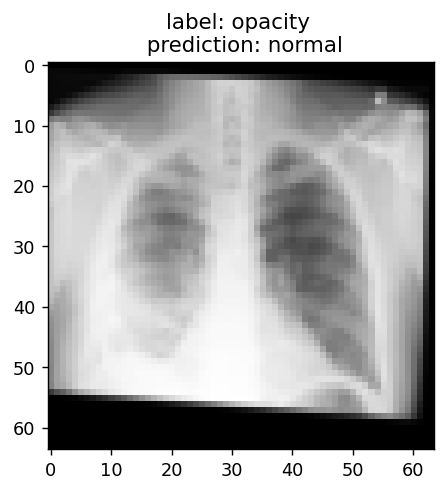

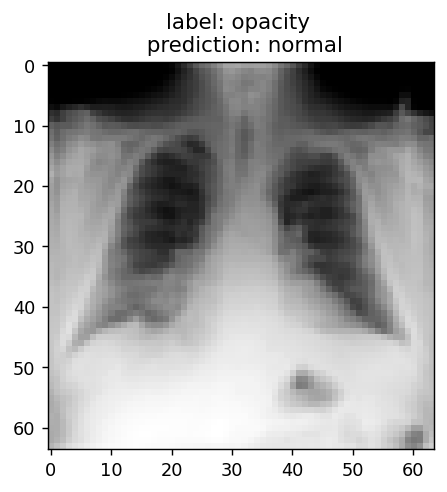

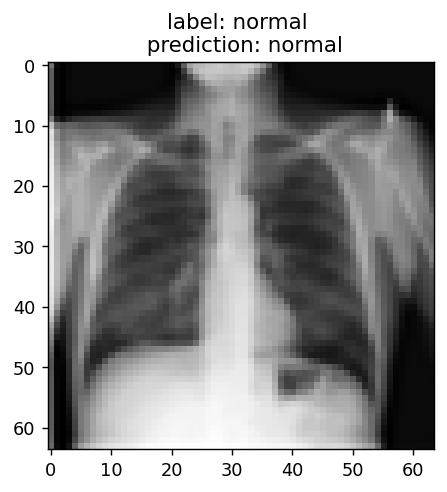

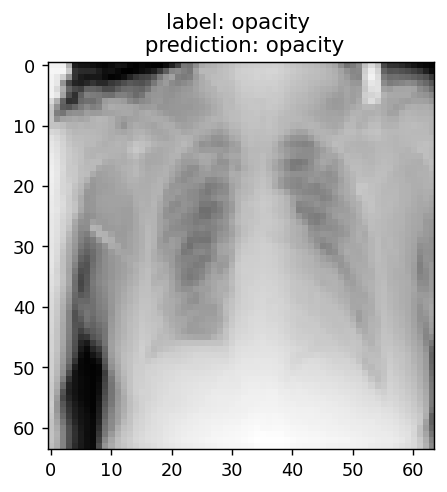

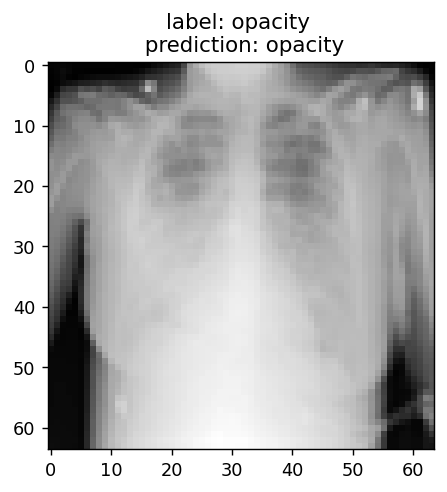

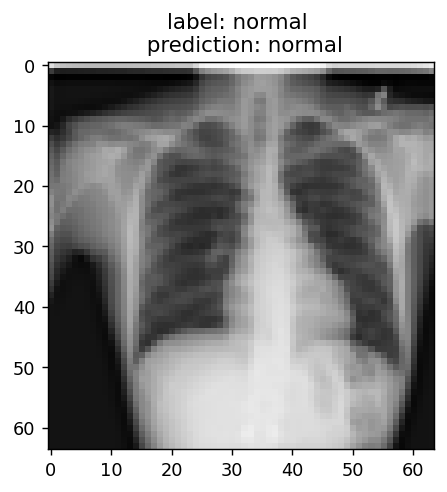

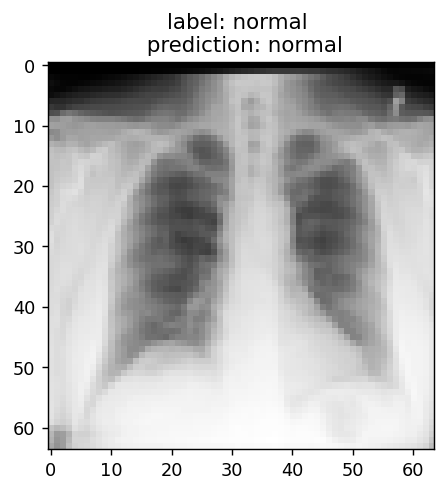

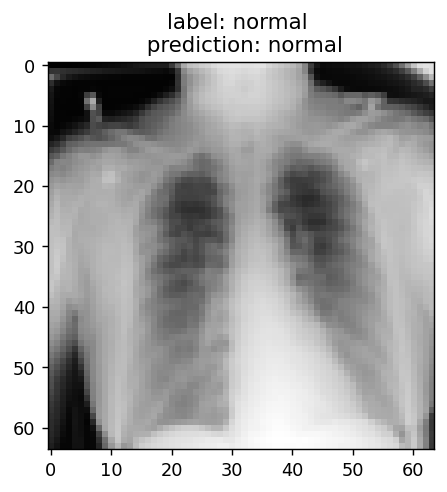

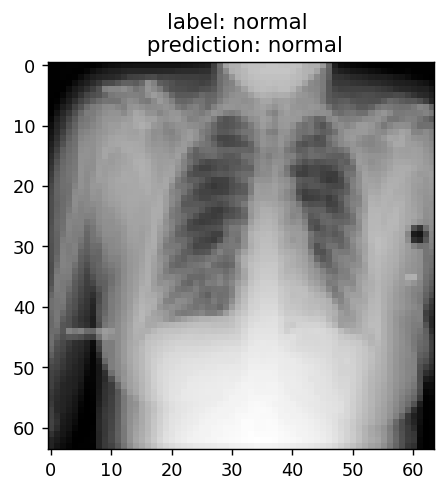

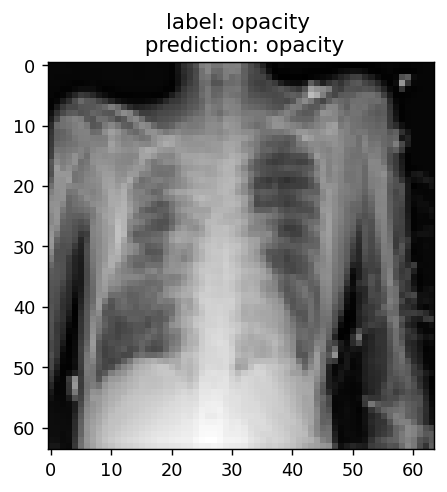

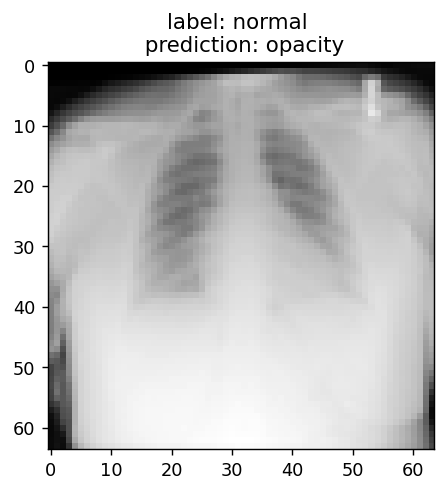

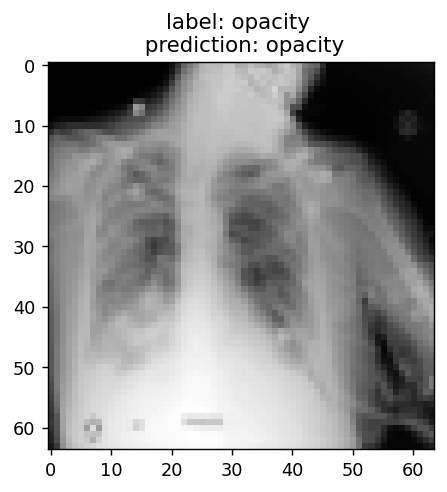

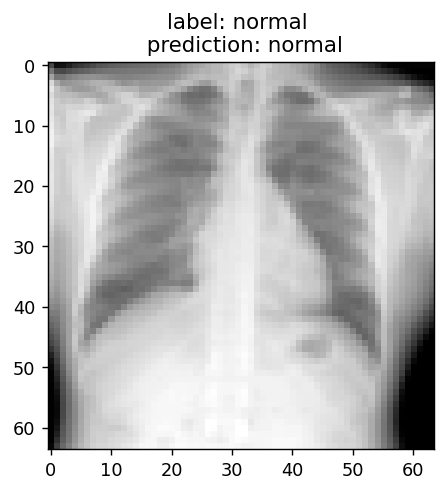

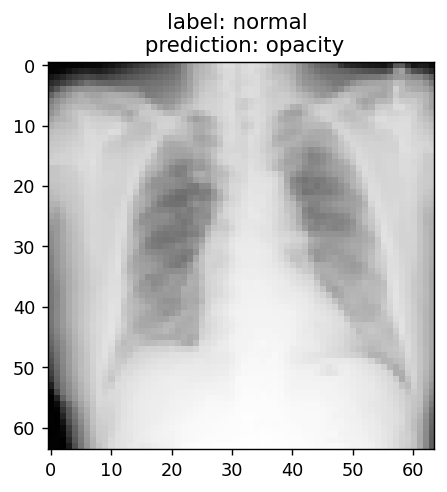

In [17]:
i = 0
for X,y in valid_iter:
  i=i+1
  X=X.to(device)
  y_hat = net(X)    
  y_hat = y_hat.argmax(dim=1)
  for n in range(8):
    plt.figure(dpi=128)
    plt.imshow(X[n].cpu().squeeze(),cmap='gray')
    plt.title('label: %s \n prediction: %s'%(tgtnames[y[n]],tgtnames[y_hat[n]]))
    plt.pause(.0001)
  if i>2:
     break